# Practica 1 Alfonso Ramos Rojas

### Cargar las librerias

- **Numpy (np)**: operaciones numéricas y manipulación de arrays; aquí se usa para crear ventanas temporales (np.lib.stride_tricks.sliding_window_view) y cálculos vectorizados.
- **Pandas (pd)**: lectura y manejo de datos tabulares/series temporales (pd.read_csv, index datetime, selección de columnas).
- **Matplotlib.pyplot (plt)**: visualización de series temporales y marcado de anomalías (plot, scatter, show).
- **Tensorflow (tf)**: framework de deep learning y backend para Keras.
- **keras.models.Sequential**: contenedor secuencial para construir la RNN/modelo.
- **keras.layers.LSTM**: capa recurrente LSTM para modelado de dependencias temporales.
- **keras.layers.Dense**: capa densa/final para producir la predicción.
- **joblib**: guardar y cargar objetos/ modelosh (serialización eficiente).

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import joblib

### Cargar datos
Cargamos todo desde el csv de datos dado

In [68]:
df = pd.read_csv("datos.csv",parse_dates=True)
print("Datos cargados: ", df.head(5))

Datos cargados:               timestamp      value
0  2013-07-04 00:00:00  69.880835
1  2013-07-04 01:00:00  71.220227
2  2013-07-04 02:00:00  70.877805
3  2013-07-04 03:00:00  68.959400
4  2013-07-04 04:00:00  69.283551


### Creamos las ventanas temporales


In [70]:
n_steps = 24
windows = np.lib.stride_tricks.sliding_window_view(df["value"], window_shape=(n_steps))
print("Ventanas temporales: \n", windows)

Ventanas temporales: 
 [[69.88083514 71.22022706 70.87780496 ... 71.55307612 72.18769545
  70.64995744]
 [71.22022706 70.87780496 68.95939994 ... 72.18769545 70.64995744
  71.34274211]
 [70.87780496 68.95939994 69.28355102 ... 70.64995744 71.34274211
  71.5867281 ]
 ...
 [71.96861391 72.11443201 73.00783047 ... 72.37020644 72.17295622
  72.04656545]
 [72.11443201 73.00783047 73.08768457 ... 72.17295622 72.04656545
  71.82522648]
 [73.00783047 73.08768457 71.32243816 ... 72.04656545 71.82522648
  72.58408858]]


### Creamos datos de entrenamiento

In [58]:
X = windows[:-1]
y = df["value"].values[n_steps:]
X = X.reshape((X.shape[0], X.shape[1], 1))
print("X: \n", X)
print("y: \n", y)

X: 
 [[[69.88083514]
  [71.22022706]
  [70.87780496]
  ...
  [71.55307612]
  [72.18769545]
  [70.64995744]]

 [[71.22022706]
  [70.87780496]
  [68.95939994]
  ...
  [72.18769545]
  [70.64995744]
  [71.34274211]]

 [[70.87780496]
  [68.95939994]
  [69.28355102]
  ...
  [70.64995744]
  [71.34274211]
  [71.5867281 ]]

 ...

 [[72.68078037]
  [71.96861391]
  [72.11443201]
  ...
  [70.45571697]
  [72.37020644]
  [72.17295622]]

 [[71.96861391]
  [72.11443201]
  [73.00783047]
  ...
  [72.37020644]
  [72.17295622]
  [72.04656545]]

 [[72.11443201]
  [73.00783047]
  [73.08768457]
  ...
  [72.17295622]
  [72.04656545]
  [71.82522648]]]
y: 
 [71.34274211 71.5867281  70.97700116 ... 72.04656545 71.82522648
 72.58408858]


### Creamos el modelo

In [ ]:
model = Sequential([
	LSTM(50, activation='tanh', input_shape=(n_steps, 1)),
	Dense(1)
])

model.compile(optimizer='adam', loss='mse')


c:\Cosas\CosasPython\PracticasSoftCritico\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Entrenamos el modelo con las ventanas

In [ ]:
epochs = 50

history = model.fit(X, y, epochs=epochs, verbose=1, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

print("Modelo entrenado exitosamente")

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3882.1982
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2472.7563
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1710.2369
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1156.9888
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 757.7831
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 477.7315
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 289.0660
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 168.2458
Epoch 9/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 95.4801 
Epoch 10/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 54.7751
Epoch 11/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 33.8704
Epoch 12/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 24.2176
Epoch 13/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 20.1261
Epoch 14/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 16.9203
Epoch 15/50
227/

### Creamos los valores de prediccion


In [61]:
predictions = model.predict(X)
errors = y - predictions.flatten()
print("Predicciones: \n", predictions)
print("Errores: \n", errors)

227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicciones: 
 [[70.84158 ]
 [70.87114 ]
 [71.15417 ]
 ...
 [72.67326 ]
 [72.079926]
 [71.463425]]
Errores: 
 [ 0.50115886  0.71558857 -0.17716602 ... -0.6266981  -0.25469906
  1.1206639 ]


### Threshold y deteccion de anomalias

In [64]:
error_IQR = np.percentile(errors, 75) - np.percentile(errors, 25)
print("Rango Intercuartil de los errores: ", error_IQR)
anomalies = np.where(np.abs(errors) > 1.7 * error_IQR)[0]
print("Anomalías detectadas en los índices: ", anomalies)
print("Número de anomalías detectadas: ", len(anomalies))
error_df = df.iloc[anomalies]

Rango Intercuartil de los errores:  1.1829205699902303
Anomalías detectadas en los índices:  [  11   88  130  138  256  304  330  350  424  440  520  586  594  636
  706  756  757  890  893  921  987 1058 1070 1112 1155 1277 1355 1533
 1581 1695 1725 2091 2092 2111 2369 2626 3125 3428 3673 3674 3675 3678
 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706
 4075 4197 4201 4554 4630 4914 4963 5054 5080 5411 5458 5459 5462 5464
 5488 5511 5530 5531 5576 5598 5625 5697 5719 5720 5791 5836 5859 5861
 5862 5872 5873 5921 5924 5944 6016 6029 6048 6077 6108 6203 6205 6206
 6211 6229 6275 6349 6420 6516 6598 6684 6732 6780 6804 6852 6853 6877
 6921 6925 7022 7033 7046 7047 7056 7066 7070 7079 7092 7132 7187 7188
 7189 7196 7212 7213 7235]
Número de anomalías detectadas:  131


### Graficamos anomalias

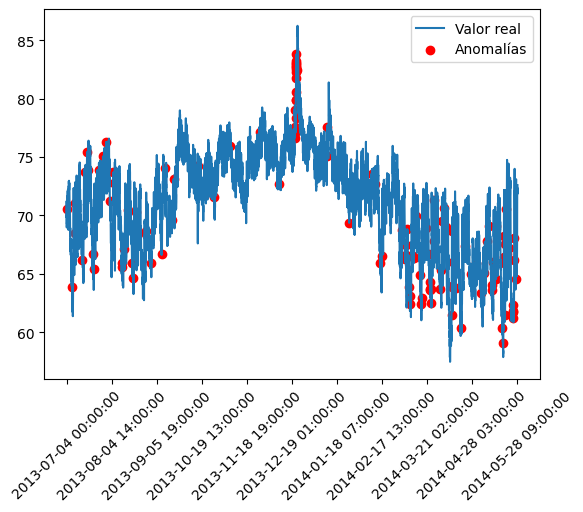

In [67]:
plt.plot(df['timestamp'], df['value'], label='Valor real')
plt.scatter(
    df['timestamp'][anomalies],
    df['value'][anomalies],
    color='red',
    label='Anomalías')
plt.xticks(df['timestamp'][::len(df)//10], rotation=45)
plt.legend()
plt.show()